In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('air-quality-data.csv')

In [42]:
# Function to categorize air quality based on PM2.5 levels
def air_quality_category(pm_value):
    if (pm_value >= 0) & (pm_value <= 12.0):
        return "Good"
    elif (pm_value > 12.1) & (pm_value <= 35.4):
        return "Moderate"
    elif (pm_value > 35.5) & (pm_value <= 55.4):
        return "Unhealthy for Sensitive Groups"
    elif (pm_value > 55.5) & (pm_value <= 150.4):
        return "Unhealthy"
    elif (pm_value > 150.5) & (pm_value <= 250.4):
        return "Very Unhealthy"
    else:
        return "Hazardous"

In [6]:
df


,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

 # To convert a column datatype to Timestamp format 

In [9]:
 #creates a new column Year that contains the year part of each date from the Timestamp column.
df['Year']= df.Timestamp.dt.year #
df

,Timestamp,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018
2,2018-01-01 02:00:00,86.06,2018
3,2018-01-01 03:00:00,94.04,2018
4,2018-01-01 04:00:00,108.78,2018
...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021
31857,2021-12-31 20:00:00,71.56,2021
31858,2021-12-31 21:00:00,70.27,2021
31859,2021-12-31 22:00:00,66.78,2021


## The Year wise average pollution with a line chart

In [10]:
year_avg = df.groupby('Year')['PM2.5'].mean()

<Axes: xlabel='Year'>

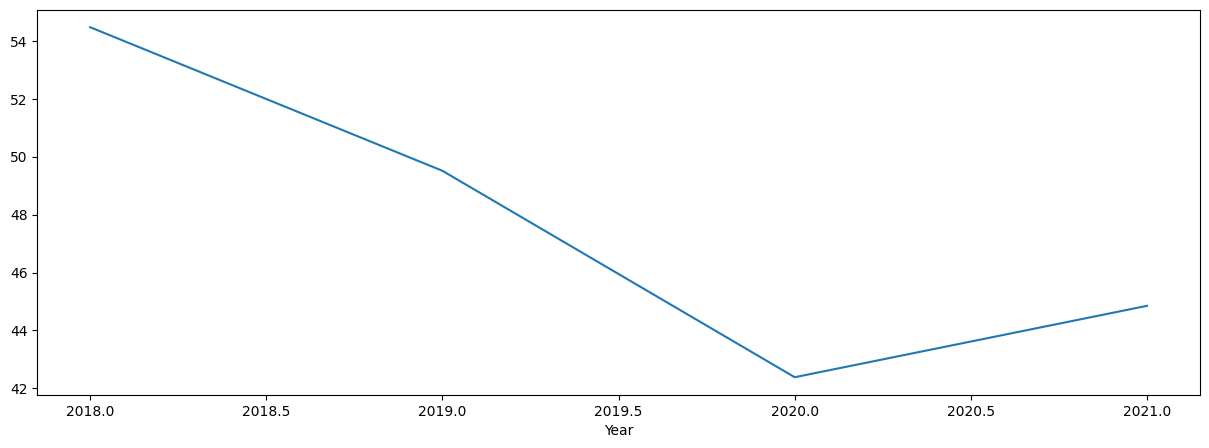

In [11]:
year_avg.plot(kind='line', figsize=(15,5))

## Draw the Area plot showing the average pollution Month wise.

In [12]:
 #creates a new column Month that contains the month part of each date from the Timestamp column.
df['Month'] = df.Timestamp.dt.month


In [13]:
month_avg = df.groupby('Month')['PM2.5'].mean()


<Axes: xlabel='Month'>

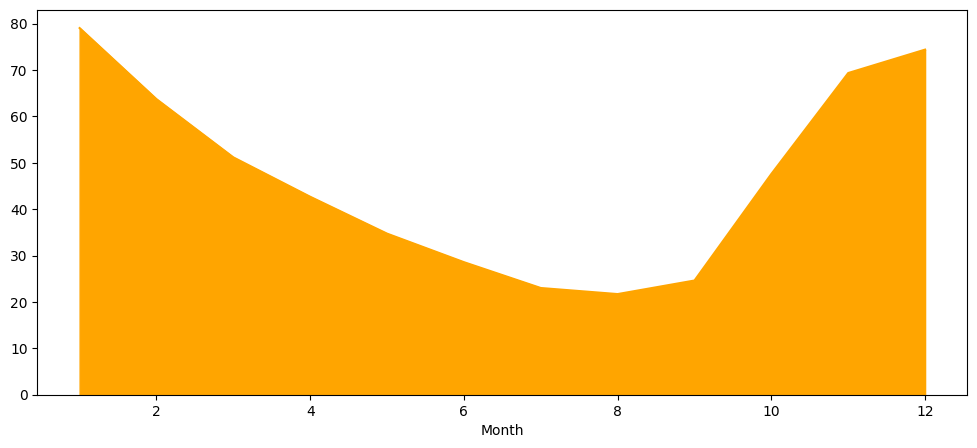

In [14]:
month_avg.plot(kind='area', figsize=(12,5), color='orange')

## Draw a Bar graph to show the Hour-wise average pollution.

In [15]:
df['Hour'] = df.Timestamp.dt.hour

In [16]:
hour_avg = df.groupby('Hour')['PM2.5'].mean()

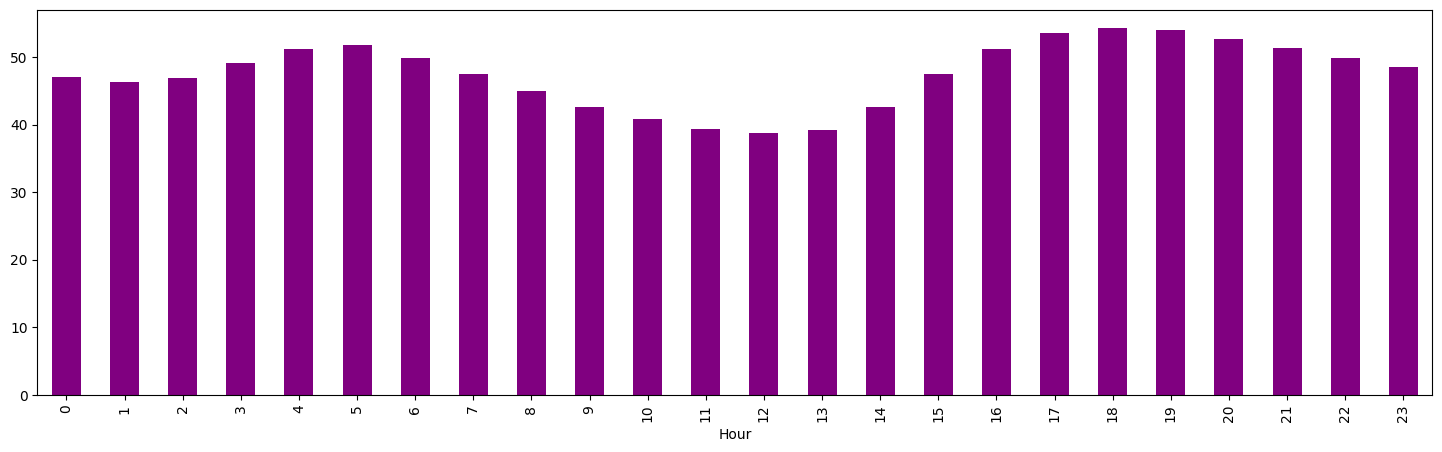

In [17]:
hour_avg.plot(kind='bar', figsize=(18,5), color='purple');

## In which month(s) was the air quality recorded as 'Very Unhealthy'?

In [21]:
x = df[(df['PM2.5']>=150.5) & (df['PM2.5'] <= 250.4)] #Condition
x.value_counts('Month')

Month
7     7
1     6
11    6
10    5
8     3
6     1
Name: count, dtype: int64

The result shows the number of times PM2.5 levels between 150.5 and 250.4 occurred in each month.This helps analyze which months had more instances of poor air quality in the given range.

July (7) had the highest occurrences (7 times).

January (1) & November (11) had 6 occurrences each.

October (10) had 5 occurrences.

August (8) & June (6) had fewer cases (3 and 1, respectively).

## In which month(s) was the air quality recorded as 'Good?

In [24]:
y = df[df['PM2.5']<=12.0] #Condition

y.value_counts('Month')

Month
8    33
9     8
7     6
6     5
Name: count, dtype: int64

## In year 2018, how many times the AQI was recorded 'Moderate'.

In [27]:
z = df[(df['Year'] == 2018) & (df['PM2.5'] >= 12.1) & (df['PM2.5'] <= 35.4)]
z.Year.unique()

array([2018], dtype=int32)

In [28]:
z['PM2.5']

1820     33.34
2038     35.39
2215     28.90
2306     34.83
2307     33.50
         ...  
9981     19.75
9982     19.27
9983     18.96
10004    17.45
10006    18.77
Name: PM2.5, Length: 2239, dtype: float64

## How was weather in the month of January and July.


In [46]:
# Calculate PM2.5 averages for specific Months
jan_pm25 = df[df['Month'] == 1]['PM2.5'].mean()
jul_pm25 = df[df['Month'] == 7]['PM2.5'].mean()



# Results with air quality classification
print(f"Average PM2.5 in January: {round(jan_pm25, 2)} ({air_quality_category(jan_pm25)})")
print(f"Average PM2.5 in July: {round(jul_pm25, 2)} ({air_quality_category(jul_pm25)})")


Average PM2.5 in January: 79.06 (Unhealthy)
Average PM2.5 in July: 23.01 (Moderate)
